In [12]:
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import os.path as osp
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

os.chdir("/Users/tienphat/Documents/HCMUS/Statistic_Application/covid_analysis")
data_dir = "dataset"

#texas_df= pd.read_csv(osp.join(data_dir, "Texas.csv"))
state_df = pd.read_csv(osp.join(data_dir, "all_state_data.csv"))

country_col = 'Country/Region'
state_col = 'Province/State'

In [13]:
china_df = state_df[state_df[country_col] == 'Mainland China']
china_df[state_col].value_counts()

Gansu             177
Hebei             177
Beijing           175
Guangdong         175
Heilongjiang      175
Shaanxi           175
Qinghai           175
Chongqing         175
Hainan            175
Tianjin           175
Jiangsu           175
Hubei             175
Henan             175
Sichuan           175
Hunan             175
Liaoning          175
Yunnan            175
Fujian            175
Anhui             175
Jiangxi           175
Jilin             175
Ningxia           175
Shanxi            175
Guizhou           175
Shandong          175
Xinjiang          175
Shanghai          175
Zhejiang          175
Guangxi           175
Inner Mongolia    175
Tibet             169
Name: Province/State, dtype: int64

In [4]:
len(state_df['ObservationDate'].unique())

175

In [15]:
us_df = state_df[state_df[country_col] == 'US']
us_df[state_col].value_counts()

Washington               137
Illinois                 134
California               133
Arizona                  133
Colorado                 127
                        ... 
Charlotte County, FL       1
Norwell County, MA         1
Lackland, TX               1
Harrison County, KY        1
Bennington County, VT      1
Name: Province/State, Length: 199, dtype: int64

## Review data

In [36]:
important_cols = ['Confirmed', 'Deaths', 'Recovered', 'Infected','ObservedDate']

def choose_important_cols(country: str, state: str):
    chosen_df = china_df = state_df[state_df[country_col] == country]
    chosen_df = chosen_df[chosen_df[state_col]==state][['Confirmed', 'Deaths', 'Recovered', 'ObservationDate']]
    chosen_df.rename(columns={'ObservationDate': 'Day'}, inplace=True)
    
    chosen_df['Infected'] = chosen_df['Confirmed'] - chosen_df['Recovered'] - chosen_df['Deaths']
    
    return chosen_df


In [37]:
def distribution_active_cases(df, att='Active'):
    # df['Day'] = df['Day'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
    
    fig=px.bar(df, x='Day', y=att)
    fig.update_layout(title=f"Distribution of Number of {att} Cases",
                      xaxis_title="Date",yaxis_title="Number of Cases")
    fig.show()

In [130]:
def full_plotly(focus_df, cols=important_cols, title='Huabei'):
#     distribution_active_cases(focus_df, 'Confirmed')
#     distribution_active_cases(focus_df, 'Deaths')
#     distribution_active_cases(focus_df, 'Recovered')
#     distribution_active_cases(focus_df, 'Infected')
    
    plt.figure(figsize=(15, 8))
    x_intervals = 2
    X = focus_df['Day'].tolist()
    Xi = range(175)
#    print(len(X))
    ids = list(range(0, 175, int(174/x_intervals)))
    for i in range(175):
        if i not in ids:
            X[i] = ' '

    plt.plot(Xi, focus_df['Infected'], color='red', label='Infected')
    plt.plot(Xi, focus_df['Recovered'], color='green', label='Recovered')
    plt.plot(Xi, focus_df['Deaths'], color='blue', label='Deaths')
    plt.title(title)
    plt.xticks(Xi, X)
    plt.legend()
    
    plt.show()


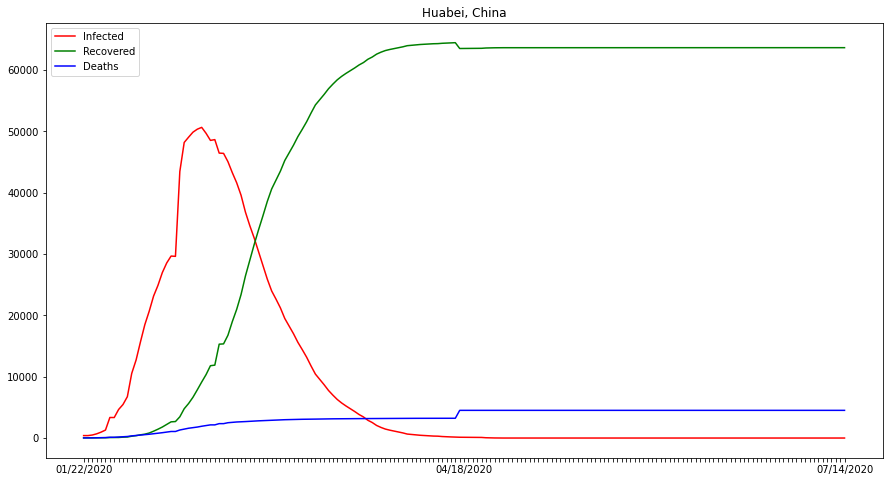

In [132]:
draft_df = choose_important_cols('Mainland China', 'Hubei')
full_plotly(draft_df, title='Huabei, China')

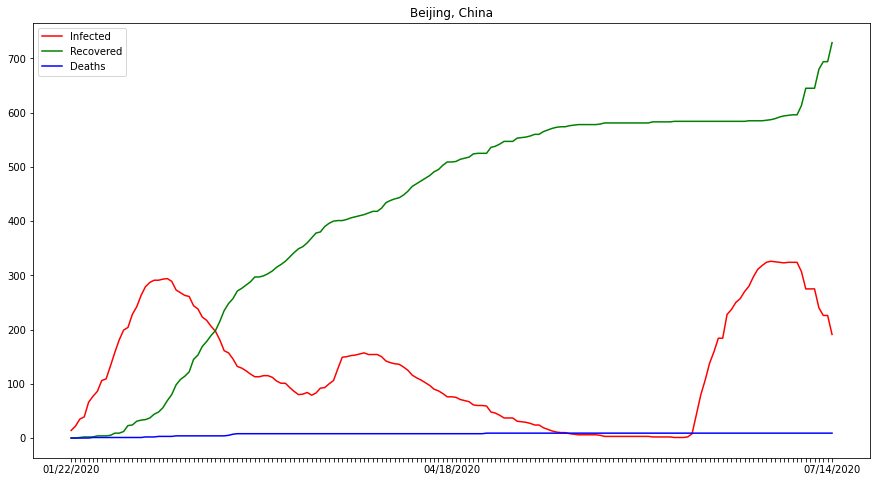

In [134]:
draft_df = choose_important_cols('Mainland China', 'Beijing')
full_plotly(draft_df, title='Beijing, China')

## Save data

In [4]:
%cd '../'

/Users/tienphat/Documents/HCMUS/Statistic_Application/project/covid_analysis


In [5]:
import pandas as pd
data = pd.read_csv('dataset/csse_combine_state/China/Tianjin.csv')
data.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
Day          0
Infected     0
dtype: int64